# Lesson 5: time series pt1, tricks & DIY

In this lesson we are going to focus a bit on longitudinal data. We have already seen line plots in one of the first lessons, and these are often used to visalise longitudinal/time-series data. In this lesson we are going to:

- See why lines are a a good idea for time series data
- look at two types of time series data
- how to efficiently plot multiple lines (& in specified colors)
- find some data and Do It Yourself!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

# Lines are a good idea

Let's do an example and tell me what you prefer and why. I'm going to load some data that some of you might be familiar with (optional excercise from lesson 2), the weather data from Ukkel. Specifically:

- the average temperatre since 2000
- the weather for the first semester (14 sep 2020 - 19 feb 2021)

In [2]:
Ukkel_avg = pd.read_csv('Ukkel_average2000.csv')
Ukkel_avg.head()

,STATION,NAME,month,day,date,average_temp,average_temp_sd
0,BE000006447,"UCCLE, BE",1,1,1-1,3.30,4.08
1,BE000006447,"UCCLE, BE",1,2,1-2,4.35,4.16
2,BE000006447,"UCCLE, BE",1,3,1-3,4.21,4.21
3,BE000006447,"UCCLE, BE",1,4,1-4,4.00,4.07
4,BE000006447,"UCCLE, BE",1,5,1-5,3.89,3.69


In [11]:
Ukkel_sem = pd.read_csv('Ukkel_latest.csv')
Ukkel_sem.head()

,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,BE000006447,"UCCLE, BE",2020-09-14,71,88.0,57.0
1,BE000006447,"UCCLE, BE",2020-09-15,77,94.0,65.0
2,BE000006447,"UCCLE, BE",2020-09-16,69,81.0,61.0
3,BE000006447,"UCCLE, BE",2020-09-17,60,69.0,53.0
4,BE000006447,"UCCLE, BE",2020-09-18,61,75.0,48.0


In [4]:
Ukkel_sem.dtypes

STATION     object
NAME        object
DATE        object
TAVG         int64
TMAX       float64
TMIN       float64
dtype: object

Problems:

- Date vs dag/maand
- Fahrenhiet/celsius

In [12]:
#Ukkel_sem['TAVG'] =  (5/9)* (Ukkel_sem['TAVG'] -32) # slecht idee remember
Ukkel_sem['TAVG_celsius'] =  (5/9)* (Ukkel_sem['TAVG'] -32)

In [13]:
Ukkel_sem.head()

,STATION,NAME,DATE,TAVG,TMAX,TMIN,TAVG_celsius
0,BE000006447,"UCCLE, BE",2020-09-14,71,88.0,57.0,21.666667
1,BE000006447,"UCCLE, BE",2020-09-15,77,94.0,65.0,25.000000
2,BE000006447,"UCCLE, BE",2020-09-16,69,81.0,61.0,20.555556
3,BE000006447,"UCCLE, BE",2020-09-17,60,69.0,53.0,15.555556
4,BE000006447,"UCCLE, BE",2020-09-18,61,75.0,48.0,16.111111


### A bit of pre-processing

To get the data in a compareable format for plotting we need to fix some things. To make it easy let's not fix this date issue but let's focus on the month of januari

- TAVG clearly not in celsius
- Select january

In [14]:
Ukkel_avg = Ukkel_avg[Ukkel_avg['month'] == 1 ] # Select only month 1 i.e. january
Ukkel_avg.sort_values(by='day', inplace = True) # sort values on day (day 1 first), inplace means the data is changed immediately in the DataFrame 
Ukkel_avg.head()

,STATION,NAME,month,day,date,average_temp,average_temp_sd
0,BE000006447,"UCCLE, BE",1,1,1-1,3.30,4.08
1,BE000006447,"UCCLE, BE",1,2,1-2,4.35,4.16
2,BE000006447,"UCCLE, BE",1,3,1-3,4.21,4.21
3,BE000006447,"UCCLE, BE",1,4,1-4,4.00,4.07
4,BE000006447,"UCCLE, BE",1,5,1-5,3.89,3.69


In [15]:
Ukkel_sem['TAVG_cel'] = (5/9)*(Ukkel_sem['TAVG']-32) # Convert to celsius, assign to other variable to avoid multiple transformations
Ukkel_sem['DATE'] = pd.to_datetime(Ukkel_sem['DATE']) # convert date to a 'datetime' object (to calculate and select with dates)

Ukkel_sem['month'] = Ukkel_sem['DATE'].dt.month # calculate the month, (2020-09-14 -> month 9)
Ukkel_sem['day'] = Ukkel_sem['DATE'].dt.day # calculat the day (2020-09-14 -> day 14)

Ukkel_sem= Ukkel_sem[ Ukkel_sem['month'] == 1 ] # select only the first month
Ukkel_sem.sort_values(by='day', inplace = True) # sort on day 
Ukkel_sem.head()

,STATION,NAME,DATE,TAVG,TMAX,TMIN,TAVG_celsius,TAVG_cel,month,day
109,BE000006447,"UCCLE, BE",2021-01-01,35,39.0,NaN,1.666667,1.666667,1,1
110,BE000006447,"UCCLE, BE",2021-01-02,36,38.0,32.0,2.222222,2.222222,1,2
111,BE000006447,"UCCLE, BE",2021-01-03,37,38.0,NaN,2.777778,2.777778,1,3
112,BE000006447,"UCCLE, BE",2021-01-04,35,NaN,35.0,1.666667,1.666667,1,4
113,BE000006447,"UCCLE, BE",2021-01-05,36,36.0,35.0,2.222222,2.222222,1,5


### making the plot

Which one do you prefer, lines or points? Why?

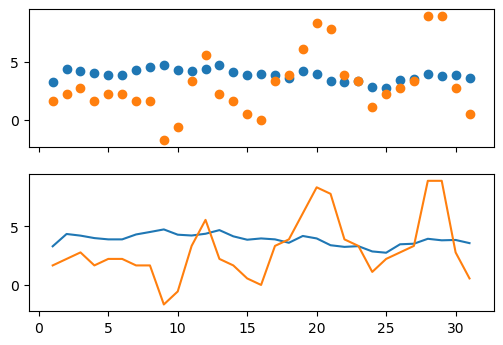

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharey= True, sharex = True)

ax1.scatter(Ukkel_avg['day'], Ukkel_avg['average_temp'], label = "Average" )
ax1.scatter(Ukkel_sem['day'], Ukkel_sem['TAVG_cel'], label = "2021" )

ax2.plot(Ukkel_avg['day'], Ukkel_avg['average_temp'], label = "Average" );
ax2.plot(Ukkel_sem['day'], Ukkel_sem['TAVG_cel'], label = "2021")

### extra, the use of inplace = True

In [17]:
Ukkel_avg.head()

,STATION,NAME,month,day,date,average_temp,average_temp_sd
0,BE000006447,"UCCLE, BE",1,1,1-1,3.30,4.08
1,BE000006447,"UCCLE, BE",1,2,1-2,4.35,4.16
2,BE000006447,"UCCLE, BE",1,3,1-3,4.21,4.21
3,BE000006447,"UCCLE, BE",1,4,1-4,4.00,4.07
4,BE000006447,"UCCLE, BE",1,5,1-5,3.89,3.69


In [18]:
Ukkel_avg.sort_values(by='average_temp')

,STATION,NAME,month,day,date,average_temp,average_temp_sd
24,BE000006447,"UCCLE, BE",1,25,1-25,2.75,3.47
23,BE000006447,"UCCLE, BE",1,24,1-24,2.86,4.16
21,BE000006447,"UCCLE, BE",1,22,1-22,3.25,3.01
0,BE000006447,"UCCLE, BE",1,1,1-1,3.30,4.08
22,BE000006447,"UCCLE, BE",1,23,1-23,3.31,3.38
20,BE000006447,"UCCLE, BE",1,21,1-21,3.39,3.56
25,BE000006447,"UCCLE, BE",1,26,1-26,3.47,4.02
26,BE000006447,"UCCLE, BE",1,27,1-27,3.52,4.32
30,BE000006447,"UCCLE, BE",1,31,1-31,3.57,4.44
17,BE000006447,"UCCLE, BE",1,18,1-18,3.60,4.13


In [19]:
Ukkel_avg = Ukkel_avg.sort_values(by='average_temp')

,STATION,NAME,month,day,date,average_temp,average_temp_sd
0,BE000006447,"UCCLE, BE",1,1,1-1,3.30,4.08
1,BE000006447,"UCCLE, BE",1,2,1-2,4.35,4.16
2,BE000006447,"UCCLE, BE",1,3,1-3,4.21,4.21
3,BE000006447,"UCCLE, BE",1,4,1-4,4.00,4.07
4,BE000006447,"UCCLE, BE",1,5,1-5,3.89,3.69


In [20]:
Ukkel_avg.sort_values(by='average_temp', inplace = True)

In [21]:
Ukkel_avg.head()

,STATION,NAME,month,day,date,average_temp,average_temp_sd
24,BE000006447,"UCCLE, BE",1,25,1-25,2.75,3.47
23,BE000006447,"UCCLE, BE",1,24,1-24,2.86,4.16
21,BE000006447,"UCCLE, BE",1,22,1-22,3.25,3.01
0,BE000006447,"UCCLE, BE",1,1,1-1,3.30,4.08
22,BE000006447,"UCCLE, BE",1,23,1-23,3.31,3.38


#### conclusion: inplace = True avoids te need to reset the DataFrame

# 2 types of (time series) data: wide vs long

gapminder.org/data

In [23]:
polio_vac = pd.read_csv('pol3_vacc.csv')
polio_vac.head()

,country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,0.03,0.05,0.05,0.16,0.15,0.11,0.25,0.35,...,0.66,0.68,0.67,0.64,0.62,0.69,0.73,0.73,0.73,0.73
1,Albania,0.92,0.92,0.92,0.92,0.92,0.94,0.94,0.94,0.96,...,0.99,0.99,0.99,0.99,0.98,0.99,0.98,0.99,0.99,0.99
2,Algeria,NaN,0.31,0.31,0.30,0.30,0.69,0.72,0.79,0.85,...,0.95,0.95,0.95,0.95,0.95,0.95,0.91,0.91,0.91,0.91
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.99,0.99,0.99,0.96,0.97,0.97,0.98,0.99,0.99,0.99
4,Angola,NaN,NaN,NaN,NaN,NaN,0.13,0.15,0.16,0.13,...,0.56,0.50,0.54,0.48,0.55,0.57,0.53,0.47,0.56,0.51


In [24]:
polio_vac_long = pd.melt(polio_vac, id_vars='country', var_name='year', value_name='percentage')
polio_vac_long

,country,year,percentage
0,Afghanistan,1980,NaN
1,Albania,1980,0.92
2,Algeria,1980,NaN
3,Andorra,1980,NaN
4,Angola,1980,NaN
...,...,...,...
7675,Venezuela,2019,0.62
7676,Vietnam,2019,0.89
7677,Yemen,2019,0.67
7678,Zambia,2019,0.89


In [25]:
polio_vac_long.dtypes

country        object
year           object
percentage    float64
dtype: object

In [26]:
polio_vac_long['year'] = polio_vac_long['year'].astype(int)

# Plotting multiple lines (data) automatically

In [28]:
belgie_data = polio_vac_long[polio_vac_long['country'] == 'Belgium']
belgie_data.head()

Afghanistan_data = polio_vac_long[polio_vac_long['country'] == 'Afghanistan']
Afghanistan_data.head()

,country,year,percentage
0,Afghanistan,1980,NaN
192,Afghanistan,1981,0.03
384,Afghanistan,1982,0.05
576,Afghanistan,1983,0.05
768,Afghanistan,1984,0.16


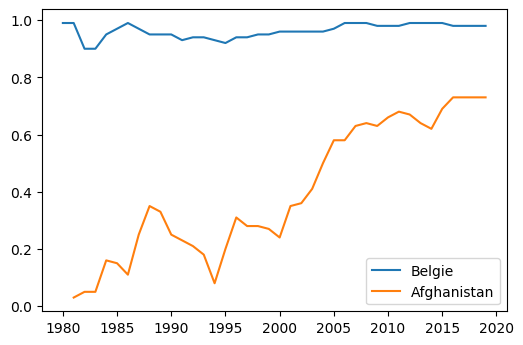

In [30]:
plt.plot(belgie_data['year'], belgie_data['percentage'], label = 'Belgie')
plt.plot(Afghanistan_data['year'], Afghanistan_data['percentage'], label = 'Afghanistan')
plt.legend();

## Something about color maps

https://matplotlib.org/stable/gallery/color/colormap_reference.html

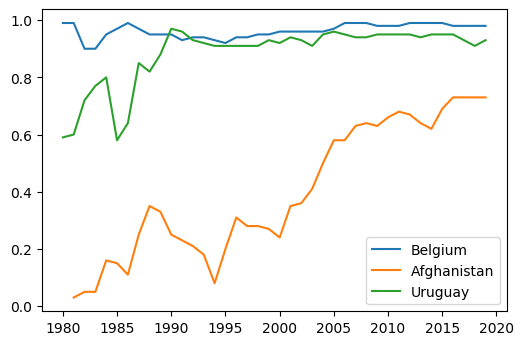

In [57]:
countries_to_plot = ['Belgium', 'Afghanistan', 'Uruguay']

plt.figure()

for country in countries_to_plot:
    #print(country)
    in_loop_data = polio_vac_long[ polio_vac_long['country'] == country]
    #print(in_loop_data.head())
    plt.plot(in_loop_data['year'], in_loop_data['percentage'], label = country)
    
plt.legend();

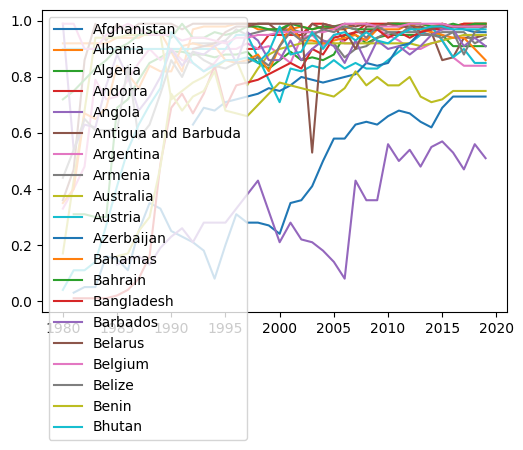

In [35]:
countries_to_plot = polio_vac['country'][0:20]

for country in countries_to_plot:
    #print(country)
    in_loop_data = polio_vac_long[polio_vac_long['country'] == country]
    plt.plot(in_loop_data['year'], in_loop_data['percentage'], label = country)
    
plt.legend();

In [ ]:
countries_to_plot = polio_vac['country']

for country in countries_to_plot:
    #print(country)
    in_loop_data = polio_vac_long[polio_vac_long['country'] == country]
    plt.plot(in_loop_data['year'], in_loop_data['percentage'], label = country)
    
plt.legend();

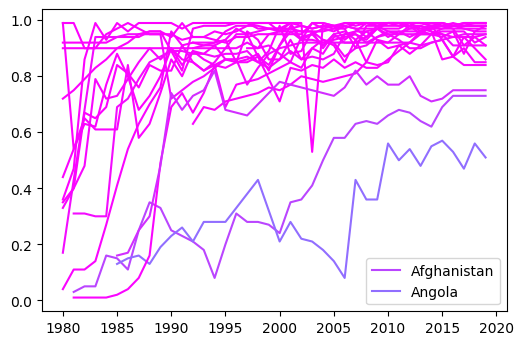

In [48]:
import matplotlib.cm as cm
#from matplotlib.colors import ListedColormap, LinearSegmentedColormap
#viridis = cm.get_cmap('viridis', 8)


countries_to_plot = polio_vac['country'][0:20]

for country in countries_to_plot:
    #print(country)
    in_loop_data = polio_vac_long[polio_vac_long['country'] == country]
    max_vac_percentage = in_loop_data['percentage'].max()
    if max_vac_percentage < 0.75:
        plt.plot(in_loop_data['year'], in_loop_data['percentage'], color = cm.cool(max_vac_percentage), label = country  )
    else:
        plt.plot(in_loop_data['year'], in_loop_data['percentage'], color = cm.cool(max_vac_percentage))
    
plt.legend();

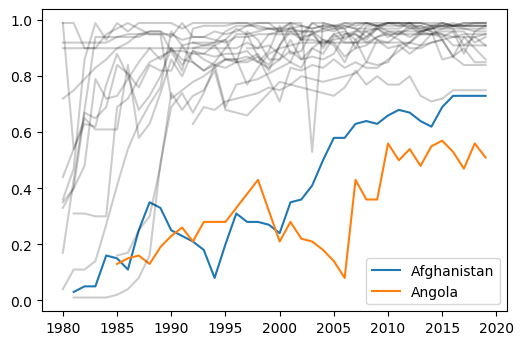

In [58]:
countries_to_plot = polio_vac['country'][0:20]

for country in countries_to_plot:
    #print(country)
    in_loop_data = polio_vac_long[polio_vac_long['country'] == country]
    max_vac_percentage = in_loop_data['percentage'].max()
    if max_vac_percentage < 0.75:
        plt.plot(in_loop_data['year'], in_loop_data['percentage'],  label = country  )
    else:
        plt.plot(in_loop_data['year'], in_loop_data['percentage'], color = "black", alpha = 0.2)
    
plt.legend();

IndexError: index 0 is out of bounds for axis 0 with size 0

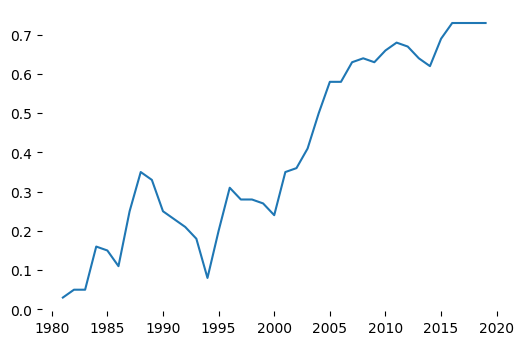

In [54]:
countries_to_plot = polio_vac['country'][0:40]

plt.figure()
plt.box(False)

for country in countries_to_plot:
    #print(country)
    in_loop_data = polio_vac_long[polio_vac_long['country'] == country]
    max_vac_percentage = in_loop_data['percentage'].max()
    if max_vac_percentage < 0.75:
        plt.plot(in_loop_data['year'], in_loop_data['percentage'],  label = country  )
        #plt.text(2021, y = in_loop_data[in_loop_data['year'] == 2020]['percentage'].values[0] , s = country )
    else:
        plt.plot(in_loop_data['year'], in_loop_data['percentage'], color = "black", alpha = 0.2)


# Do It Yourself

Depending on the time (otherwise we continue next time with this) 

1. think of something you want to visualise with the gapminder.org data (dont think of the visualisation but think think of the story you want to tell/the question you want answered)
2. get the data and load it in
3. Make a plot
